# 이변량분석 종합실습1 : car seat 매출 분석

## 환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

# 1.car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 지역 주민 평균 교육수준(범주: 11~17)	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,11,276,120,Bad,42,Yes
1,11.22,111,16,260,83,Good,65,Yes
2,10.06,113,10,269,80,Medium,59,Yes
3,7.40,117,4,466,97,Medium,55,Yes
4,4.15,141,3,340,128,Bad,38,No


In [3]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Advertising  400 non-null    int64  
 3   Population   400 non-null    int64  
 4   Price        400 non-null    int64  
 5   ShelveLoc    400 non-null    object 
 6   Age          400 non-null    int64  
 7   US           400 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 25.1+ KB


#### ① Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

In [ ]:
var = 'Advertising'

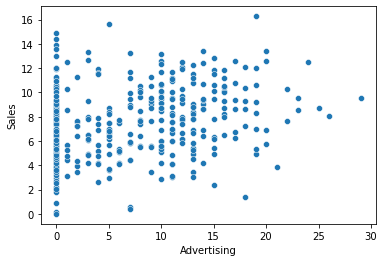

In [50]:
sns.scatterplot(x= var, y =target ,data = data)
plt.show()

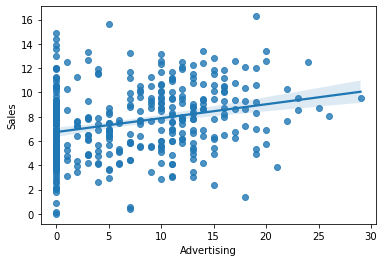

In [47]:
sns.regplot(x= var, y =target ,data = data)  # reg = regression 회귀
plt.show()

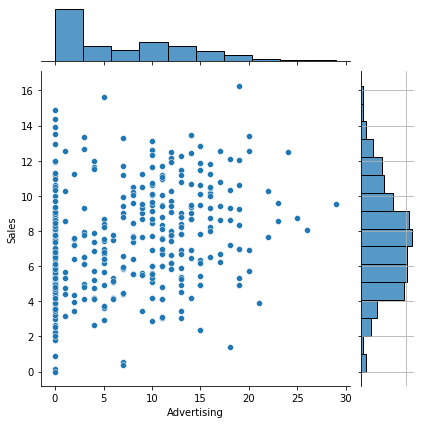

In [48]:
sns.jointplot(x=var,y=target,data=data)
plt.show()

2) 수치화 : 상관분석

In [8]:
spst.pearsonr(data[var], data[target])

(0.269506781376902, 4.377677110302732e-08)

In [9]:
data.corr()

,Sales,CompPrice,Advertising,Population,Price,Age
Sales,1.000000,0.064079,0.269507,0.050471,-0.444951,-0.231815
CompPrice,0.064079,1.000000,-0.024199,-0.094707,0.584848,-0.100239
Advertising,0.269507,-0.024199,1.000000,0.265652,0.044537,-0.004557
Population,0.050471,-0.094707,0.265652,1.000000,-0.012144,-0.042663
Price,-0.444951,0.584848,0.044537,-0.012144,1.000000,-0.102177
Age,-0.231815,-0.100239,-0.004557,-0.042663,-0.102177,1.000000


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- scatter 플롯에서 'Advertising' 이 0인부분이 너무많아 추가로 0을 제외한 값들가지고 진행을 해보면 좋을것같다.
- scatter 플롯에서는 우상향 그래프를 보이는것 같아 adver : sales 의 상관관계를 보면 0.26으로 약한편이고, p-value 0에 수렴한다. 약하지만 대립가설로 채택 할 수는 있다.

#### ② Population -> Sales

1) 시각화 : scatter(regplot), jointplot

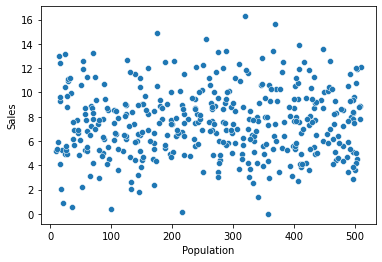

In [51]:
var = 'Population'
sns.scatterplot(x = var, y =target,data = data)
plt.show()

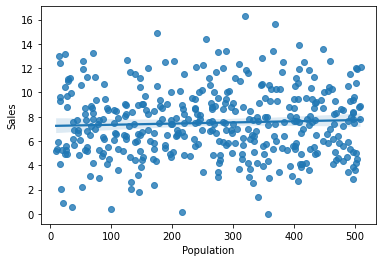

In [52]:
sns.regplot(x = var, y = target, data= data)
plt.show()

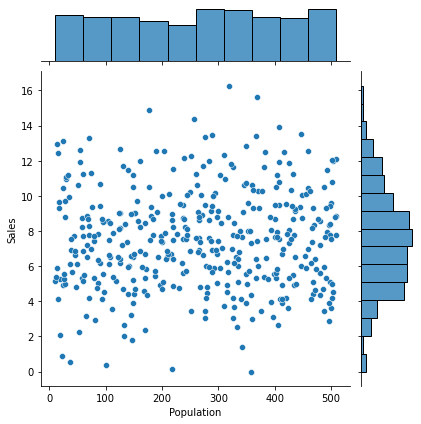

In [53]:
sns.jointplot(x = var, y = target, data = data)
plt.show()

- 어지러운 scatter플롯을 지나 joint플롯을보면 sales 는 정규분포의 형태를띄며 0에 가까운 이상치로 추측되는 부분이약간보인다.
인구의경우 전범위에 걸쳐서 고르고 분포되어있다.

2) 수치화 : 상관분석

In [55]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.0504709844720392, p-value : 0.31398160931903


- p-value 가 0.05 이상으로 대립가설로 채택할 수 없을 것이다.
상관분석도 0.05로 낮은 수치이다.

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 정말 미미하게나마 우상향 의 느낌을주는것 같다. 인구를 100단위로 분류하여 sales 평균을 집계한다면 유의미한 결과가 나올수도 있을것 같다.

- 인구수가 많으면 판매량이 많아져야 하지않을까??

#### ③ Price -> Sales

1) 시각화 : scatter(regplot), jointplot

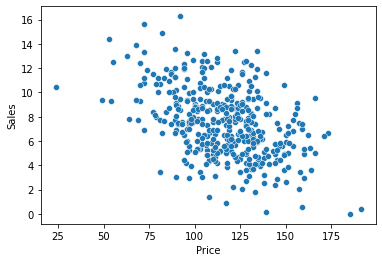

In [56]:
var = 'Price'

sns.scatterplot(x = var, y = target, data= data)
plt.show()

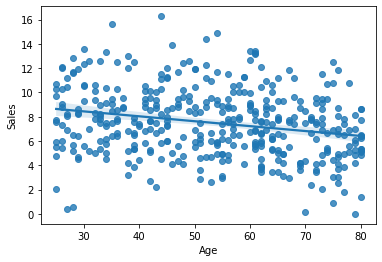

In [60]:
sns.regplot(x = var, y = target, data= data)
plt.show()

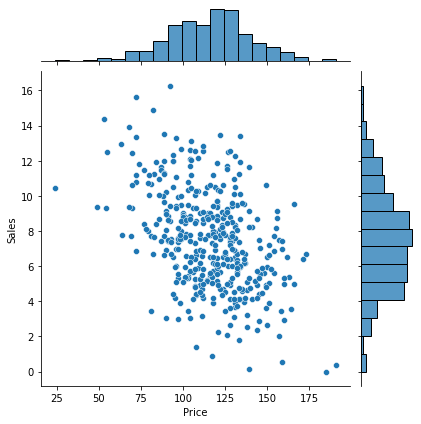

In [14]:
sns.jointplot(x = var, y = target, data= data)
plt.show()

In [ ]:
Price 부분에서 75~ 150부분이 매출읠 대부분을 차지하고있다. 

2) 수치화 : 상관분석

In [15]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

(-0.4449507278465726, 7.61818701191294e-21)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 관계가 있다, 하지만 아주강하지는 않다.

#### ④ Age -> Sales

1) 시각화 : scatter(regplot), jointplot

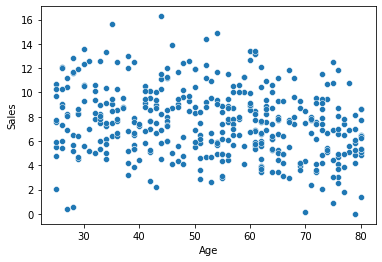

In [61]:
var = 'Age'

sns.scatterplot(x = var, y = target , data= data)
plt.show()

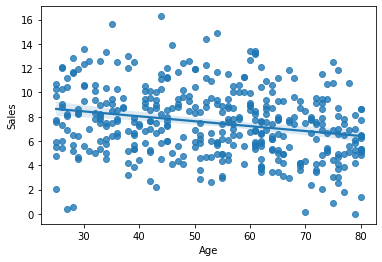

In [63]:
sns.regplot(x = var, y = target , data= data)
plt.show()

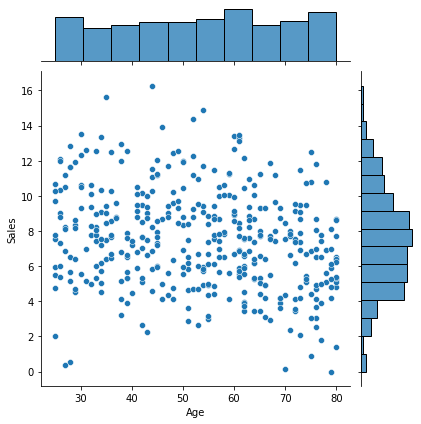

In [64]:
sns.jointplot(x = var, y = target, data= data)
plt.show()

2) 수치화 : 상관분석

In [59]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.2318154396045765, p-value : 2.7889498393711916e-06


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 추가 수집 정보 : 
    - 평균 연령(우리가 필요한 평균연령인가?)
        - ex 너무어린애들까지 포함된게아닌지 
    - 평균 + 분산(표준편차), 
    - 연령대별 인구 비율

#### ⑤ CompPrice -> Sales

1) 시각화 : scatter(regplot), jointplot

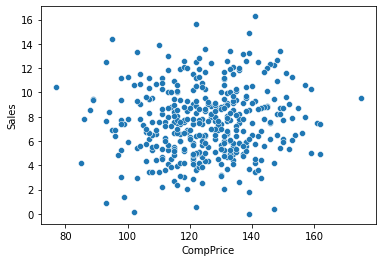

In [67]:
var = 'CompPrice'

sns.scatterplot(x = var, y = target, data= data)
plt.show()

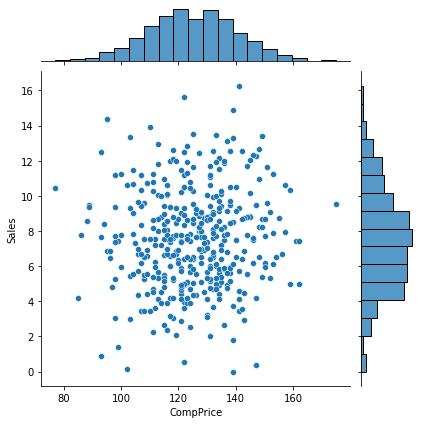

In [69]:
sns.jointplot(x = var, y = target, data= data)
plt.show()

2) 수치화 : 상관분석

In [71]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.06407872955062152, p-value : 0.2009398289418295


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 경쟁사 가격과 매출량은 관계가 적어보인다.
- 하지망 자사의 가격보다 높은 경쟁자 가격 분포에도 우리는 매출량이 딸린다 왜 일까?
- 하지만 경쟁사 가격과 자사가격의 차이로 판매량을 보면 어떨까?

- 또한 130달러인 경우에 왜 중간에 푹페여있는가 우리가 130불에 있는 제품이 강점이있는가 아니면 자사 130불 짜리는어떤가

- ANS ) 타사가격 자체를 의미가 없어보인다. 하지만 중요한부분은 타사대비 자사가격의 가격경쟁력이다.
    - 가격경쟁력 = 타사가격 - 자사가격 

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### ① ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

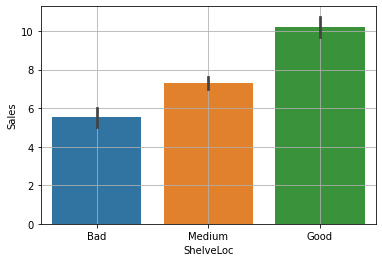

In [65]:
var = 'ShelveLoc'
sns.barplot(x = var , y = target, data= data, order= ['Bad','Medium','Good'])
plt.grid()
plt.show()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Advertising  400 non-null    int64  
 3   Population   400 non-null    int64  
 4   Price        400 non-null    int64  
 5   ShelveLoc    400 non-null    object 
 6   Age          400 non-null    int64  
 7   US           400 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 25.1+ KB


2) 수치화 : t-test, anova

In [26]:
S_B = data.loc[data[var] == 'Bad', 'Sales']
S_G = data.loc[data[var] == 'Good', 'Sales']
S_M = data.loc[data[var] == 'Medium', 'Sales']

spst.f_oneway(S_B, S_G, S_M)

F_onewayResult(statistic=92.22990509910346, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- Good으로 갈수록 너무나 확연한 Sales와 관련이있다.
- 아주강한관계

#### ② US-> Sales

1) 시각화 : 평균비교 barplot

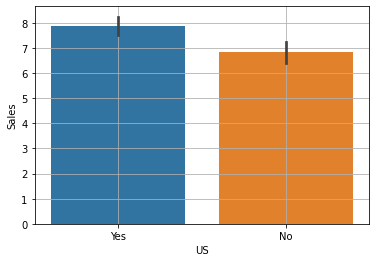

In [81]:
var = 'US'

sns.barplot(x = var, y = target, data = data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [82]:
A_Yes = data.loc[data[var] == 'Yes', 'Sales']
A_No  = data.loc[data[var] == 'No' , 'Sales']

spst.ttest_ind(A_Yes, A_No)


Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

ttest 3.6 으로 2이상, p-value 도 0.025 미만으로 유의미한 결과일수있다 대립 채택

### (3) 관계 정리하기

In [30]:
data.corr()

,Sales,CompPrice,Advertising,Population,Price,Age
Sales,1.000000,0.064079,0.269507,0.050471,-0.444951,-0.231815
CompPrice,0.064079,1.000000,-0.024199,-0.094707,0.584848,-0.100239
Advertising,0.269507,-0.024199,1.000000,0.265652,0.044537,-0.004557
Population,0.050471,-0.094707,0.265652,1.000000,-0.012144,-0.042663
Price,-0.444951,0.584848,0.044537,-0.012144,1.000000,-0.102177
Age,-0.231815,-0.100239,-0.004557,-0.042663,-0.102177,1.000000


- data correlation(숫자형vs숫자형) 으로 보면 
    - 강) Price  중) Advertising, Age  약)  Population,CompPrice 


- ttest / ANOVA 를 통해 (범주 vs 숫자)
    - 강) ShelveLoc  중간) US

① 강한관계

- ShelveLoc, Price_diff

② 중간관계

- Price ,Age ,Ad , US

③ 관계없음

- Population,CompPrice

### (4) 추가 분석

- 0인 값이 많은  Advertising 에서 만져보자

In [34]:
# 광고비 예산이 0인 지역의 비욜
data.loc[data['Advertising'] == 0 , :  ].shape[0] / data.shape[0]

# 광고비가 0인 비율이 36프로나됨

0.36

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


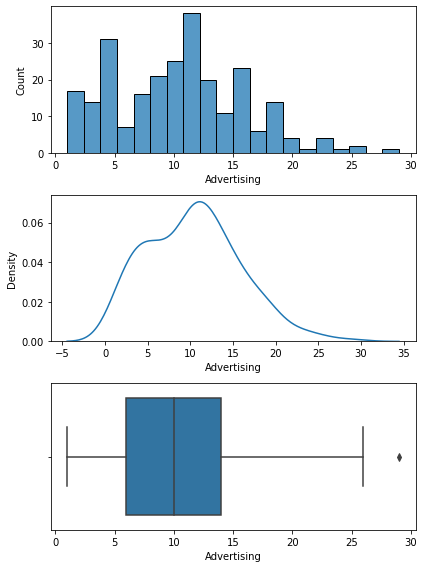

In [36]:
var = 'Advertising'
temp = data.loc[data[var] != 0 ,:]
plt.figure(figsize = (6,8))

plt.subplot(3,1,1)
sns.histplot(temp[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(temp[var])

plt.subplot(3,1,3)
sns.boxplot(temp[var])

plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

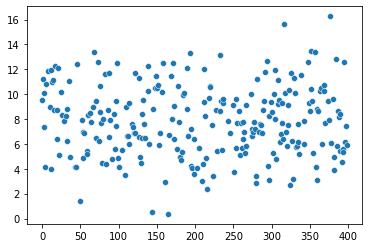

In [46]:
tmp= data.loc[data['Advertising'] != 0, 'Sales' ]

sns.scatterplot(tmp.index, tmp.values)


In [43]:
spst.pearsonr(tmp.index, tmp.values)

(-0.007478941592518794, 0.9052126718952098)

- 대립가설 기각

In [72]:
data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,11,276,120,Bad,42,Yes
1,11.22,111,16,260,83,Good,65,Yes
2,10.06,113,10,269,80,Medium,59,Yes
3,7.40,117,4,466,97,Medium,55,Yes
4,4.15,141,3,340,128,Bad,38,No


In [73]:
# 가격경쟁력 변수 추가

data['Price_diff'] = data['CompPrice'] - data['Price']

data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,US,Price_diff
0,9.50,138,11,276,120,Bad,42,Yes,18
1,11.22,111,16,260,83,Good,65,Yes,28
2,10.06,113,10,269,80,Medium,59,Yes,33
3,7.40,117,4,466,97,Medium,55,Yes,20
4,4.15,141,3,340,128,Bad,38,No,13


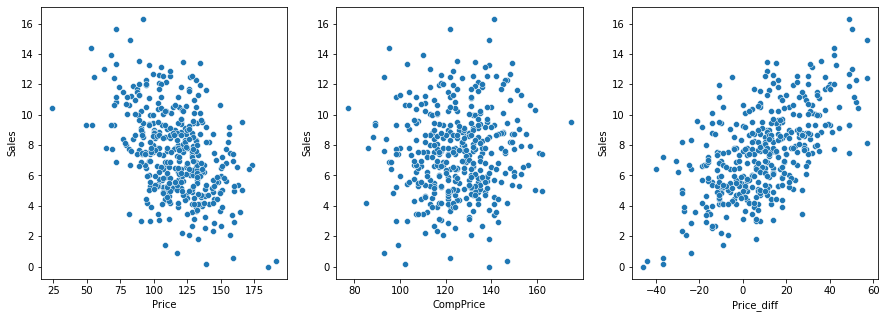

In [79]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.scatterplot(x = 'Price', y = 'Sales', data = data)

plt.subplot(1,3,2)
sns.scatterplot(x = 'CompPrice', y = 'Sales', data = data)

plt.subplot(1,3,3)
sns.scatterplot(x = 'Price_diff', y = 'Sales', data = data)

plt.show()

In [77]:
print(spst.pearsonr(data['Price'], data['Sales']))
print(spst.pearsonr(data['CompPrice'], data['Sales']))
print(spst.pearsonr(data['Price_diff'], data['Sales']))

(-0.4449507278465726, 7.61818701191294e-21)
(0.06407872955062152, 0.2009398289418295)
(0.5979217124533921, 3.877120641788835e-40)


In [ ]:
- 결론 ) 가격 경쟁력(타사-자사) 타사가 비쌀수록 판매량이 증가한다.